In [1]:
import pandas as pd
import numpy as np
import os
import sklearn as sk


In [20]:
import seaborn as sns
import plotly as ply

In [2]:
os.chdir(r"C:\Users\ARPIT SHARMA\Desktop\lgm\LGMVIP--DataScience-Iris-flower-classification-ML-1\iris dataset")
files=os.listdir(r"C:\Users\ARPIT SHARMA\Desktop\lgm\LGMVIP--DataScience-Iris-flower-classification-ML-1\iris dataset")


In [3]:
files

['bezdekIris.data', 'Index', 'iris.data', 'iris.names']

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


["sepal length","sepal width","petal length","petal width"]

In [10]:
iris_data=pd.read_csv("iris.data",names=["sepal length","sepal width","petal length","petal width","type"])

In [13]:
bIris_data=pd.read_csv("bezdekIris.data",names=["sepal length","sepal width","petal length","petal width","type"])

In [14]:
iris_data.shape

(150, 5)

In [15]:
bIris_data.shape

(150, 5)

    1. Identification of variables and data types

In [5]:
iris_data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
type             object
dtype: object

    2. Understanding the feature Variables(Trian-Test)

In [17]:
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
bIris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


CONCLUDING THAT THE DATA IS CLEAN AND SAME IN iris_data and bIris_data

    3. Analyzing the basic matrix

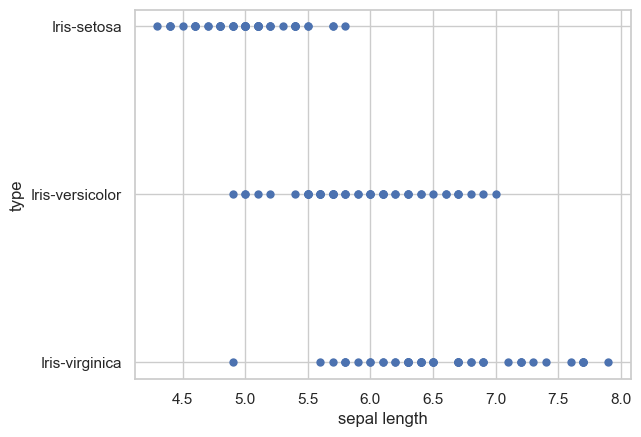

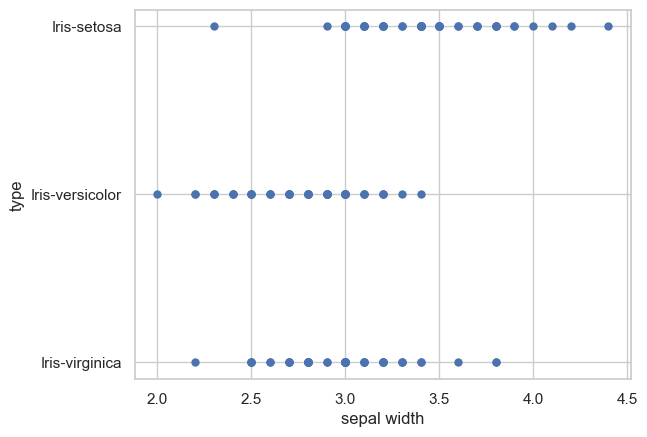

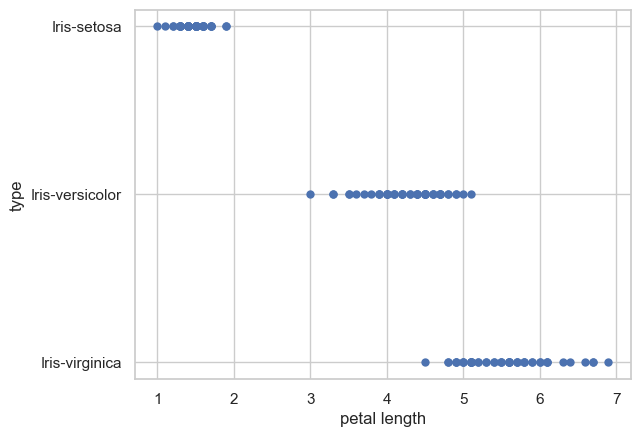

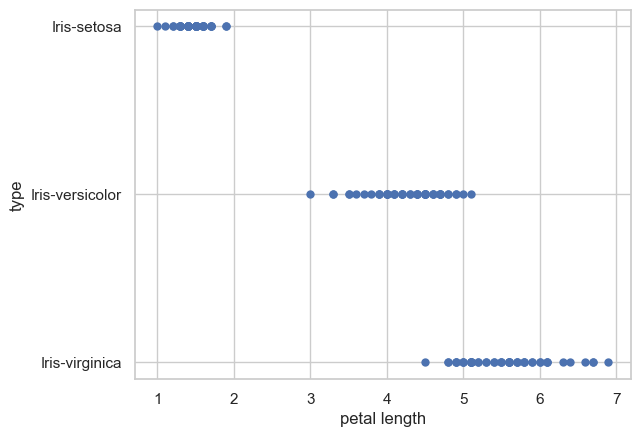

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
df= iris_data

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=df["sepal length"], y=df["type"],
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["sepal width"], y=df["type"],
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["petal length"], y=df["type"],
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()
sns.scatterplot(x=df["petal length"], y=df["type"],
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df)
plt.show()

    4. Non graphihical univariate analysis

    5. Bibariate Analysis

    6 Graphical univariate Analysis

    7. Graphical Bivariate Analysis

    8. Is there any missing values and do we have to delete it or replace it

    9. what are outyliers ? How many of them are there ? Are they more then (+3 S.D)